In [1]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [2]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum, plot_cepstral_coefficients
from biosonic.filter import mel_filterbank, log_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum, dominant_frequencies
from biosonic.handle import read_wav

In [3]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 200
f2 = 2000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

In [4]:
from biosonic.compute.utils import hz_to_mel

hz_to_mel(200)

np.float64(652.1609413889511)

<Axes: title={'center': 'log-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

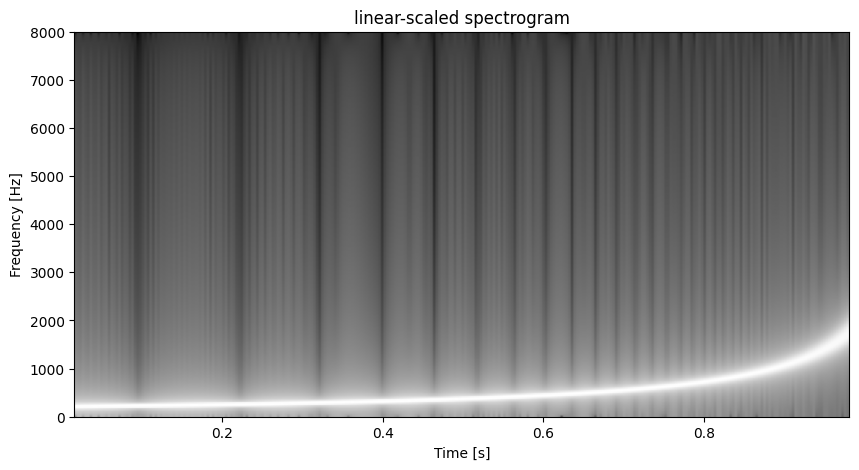

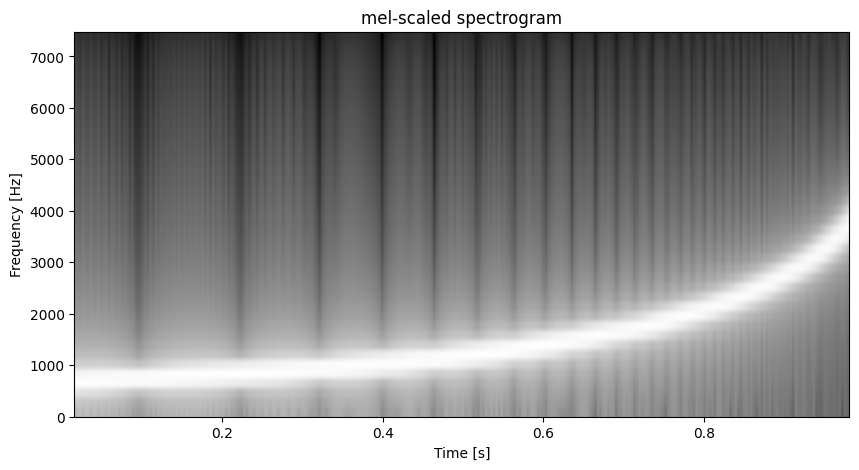

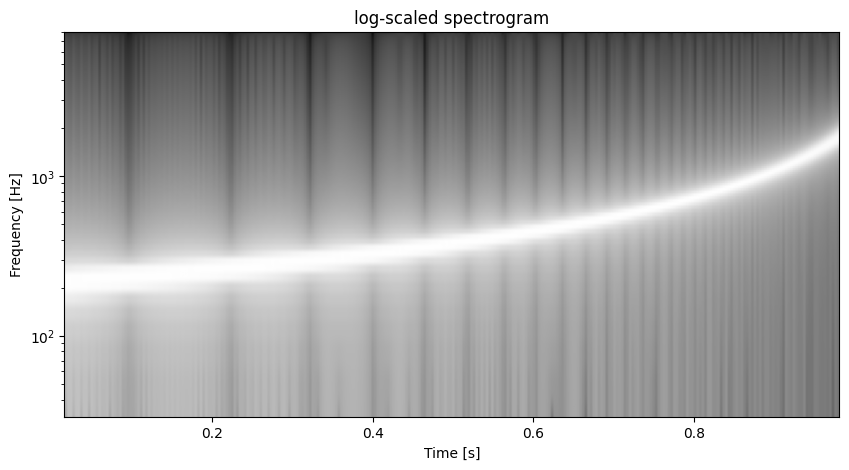

In [5]:
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey')

plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="mel")

plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="log", flim=(0,8000), n_bands=24)

In [6]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/code/WorkshpTim/bfsongrepo/gr41rd51/062012/gr41rd51__3part_SYLc_th4191_belowhits_200612_0707.4514.wav")

<Axes: title={'center': 'log-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

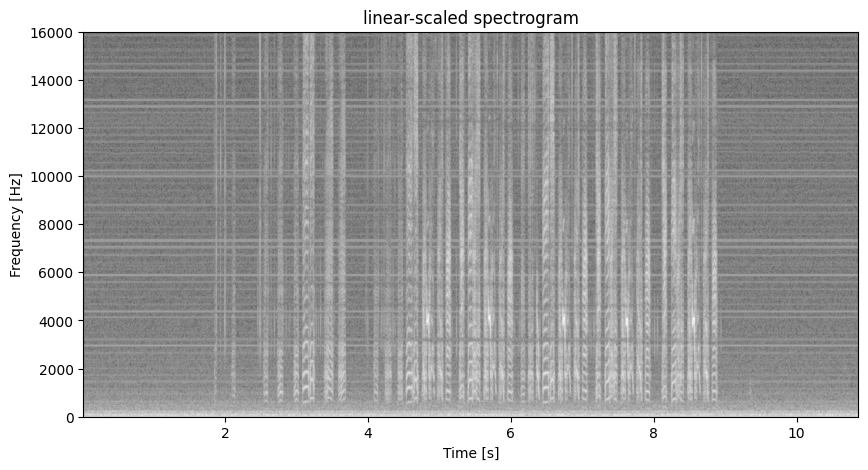

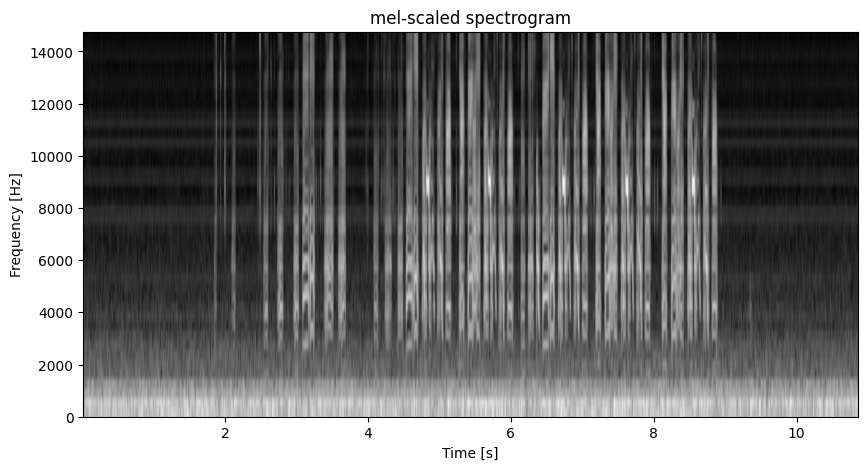

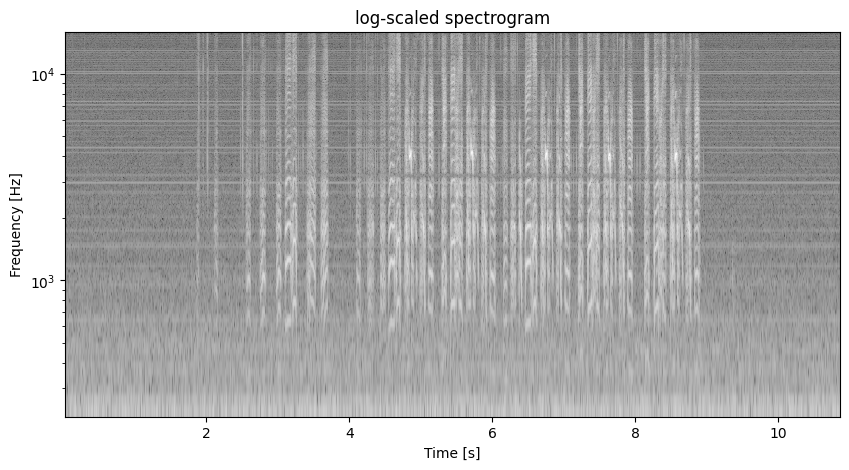

In [7]:
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey')
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="mel")
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="log", flim=(200, 20000), n_bands = 24)

[3.11514    0.98424304 0.01023507 ... 0.00475861 0.01023507 0.98424304]


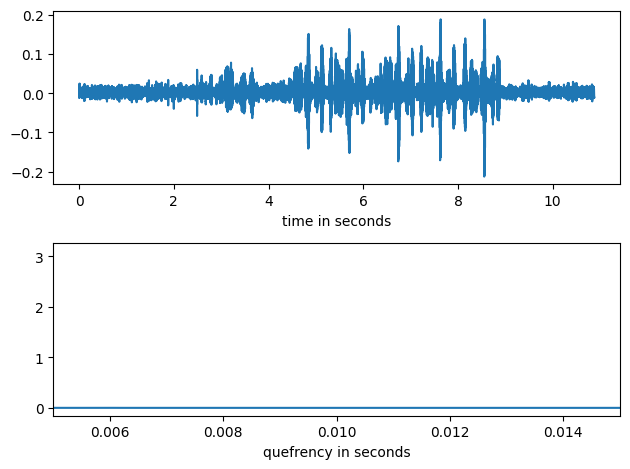

In [8]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
print(ceps)
plot_cepstrum(signal_.data, signal_.sr)

In [9]:
# fbanks, _ = mel_filterbank(10, n_fft, sr)
# ceps = cepstrum(x, sr)
# plot_cepstral_coefficients(x, sr, n_fft)
# #ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)

# plot_filterbank_and_cepstrum(
#         fbanks, 
#         sr,
#         n_fft, 
#         ceps, 
#         fmax=None, 
#         title_prefix="")
# plot_cepstrum(x, sr)

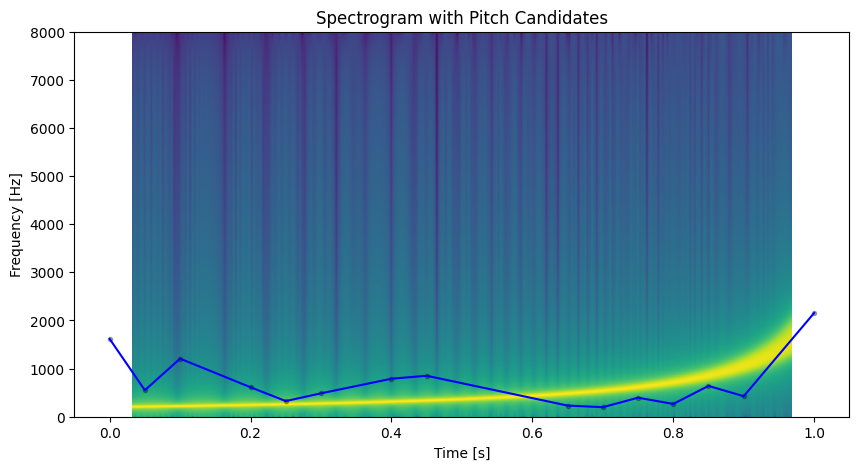

[np.float64(1617.7927777827963), np.float64(550.6416447249338), np.float64(1206.5379092617525), 0.0, np.float64(612.5230471060763), np.float64(325.4662611417306), np.float64(486.1796311154134), 0.0, np.float64(789.7089602693532), np.float64(851.3418209396905), 0.0, 0.0, 0.0, np.float64(231.630006991804), np.float64(197.94511162908586), np.float64(394.8585166821579), np.float64(265.51365817452535), np.float64(639.8788851130583), np.float64(426.2037388996327), 0.0, np.float64(2155.9998839491777)]


In [10]:
from biosonic.plot import plot_pitch_candidates, plot_pitch_on_spectrogram
from biosonic.compute.pitch import boersma, yin

# praat autocorrelation pitch tracking
time_points, candidates = boersma(x, sr, min_pitch=180, max_pitch=2100, voicing_thresh=.6, timestep=0.05)
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))
print(candidates)

# # yin method
# pitch_points = yin(x, sr, n_fft, 0.01, (100, 8000))
# print(pitch_points)
# time_points = np.arange(len(pitch_points)) * 0.01
# plot_pitch_candidates(time_points, pitch_points)
# plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

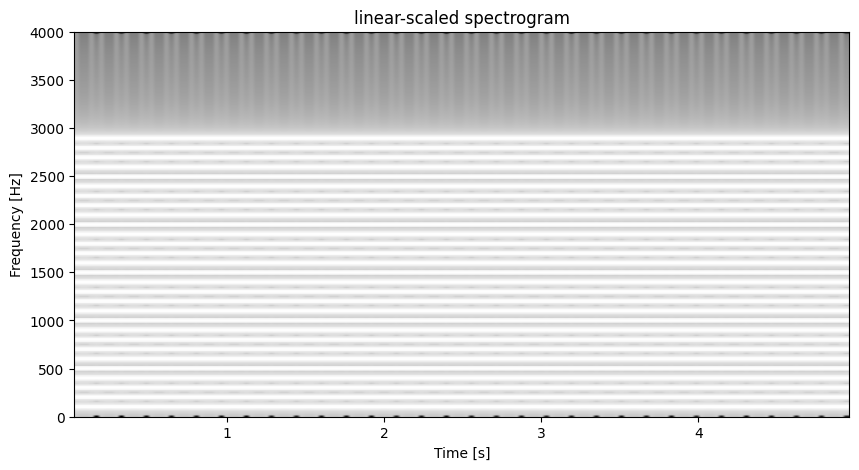

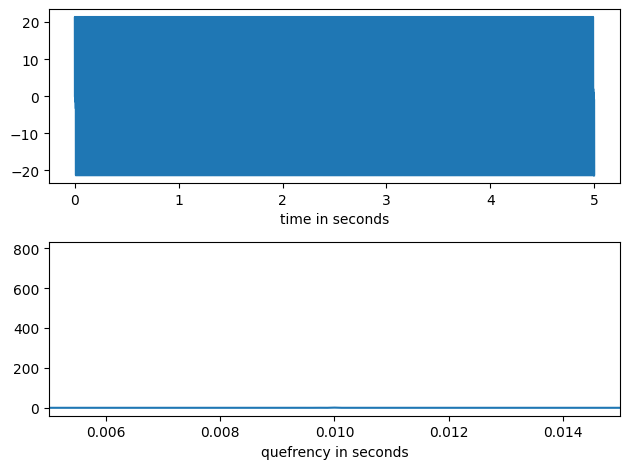

In [11]:
duration = 5.0
sr = 8000.0
samples = int(sr*duration)
t = np.arange(samples) / sr
fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
data = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

Sx, t, f = spectrogram(data, sr)
plot_spectrogram(data, sr, cmap='grey', window_length=512)
plot_cepstrum(data, sr)

In [12]:
# from biosonic.handle import batch_normalize_wav_files

# batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/compute/pitch.py:376: RuntimeWarning: divide by zero encountered in divide
  sampled_autocorr = lag_domain / autocorr_hann
/Users/lenagies/Desktop/Master/Nebenjob/biosonic/.venv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2320: RuntimeWarning: invalid value encountered in scalar subtract
  p = (xf - fulc) * q - (xf - nfc) * r
/Users/lenagies/Desktop/Master/Nebenjob/biosonic/.venv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2321: RuntimeWarning: invalid value encountered in scalar subtract
  q = 2.0 * (q - r)


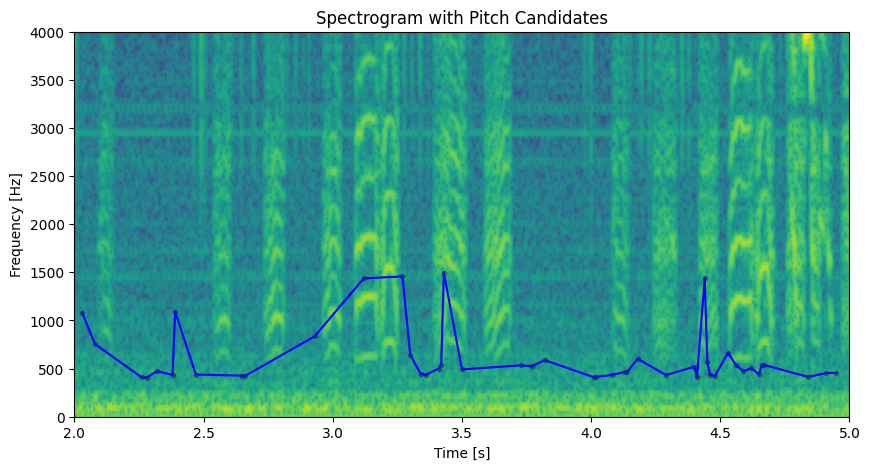

In [13]:
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=400, max_pitch=1500, voicing_thresh=0.1)
# Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,4000), tlim=(2,5))

# # yin method
# pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (100, 2000))
# time_points = np.arange(len(pitch_points)) * 0.01
# # Plot
# plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,8000))

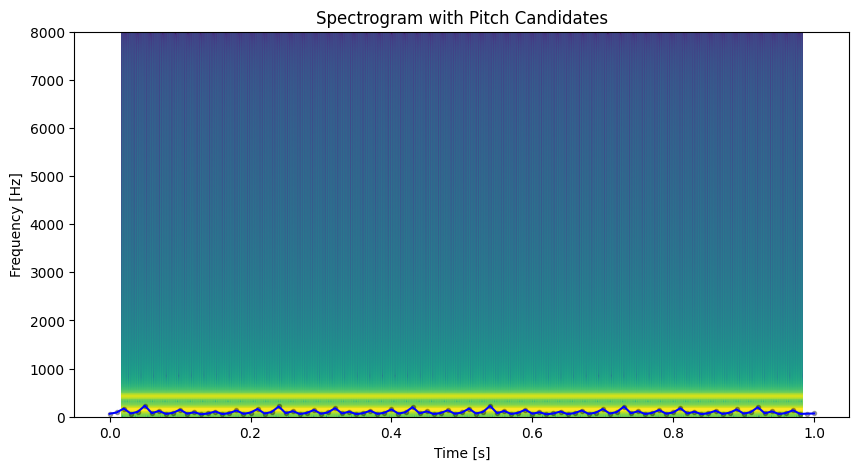

KeyboardInterrupt: 

In [14]:
from biosonic.synthesize import amplitude_modulated

sr = 16000
n_fft = 512
time_points = np.linspace(0, 1, sr)
x = amplitude_modulated(time_points, 140, 280)
# plot_spectrogram(x, sr, flim=(0, 2500))

times, candidates = boersma(x, sr, min_pitch=50, max_pitch=1000)
plot_pitch_on_spectrogram(x, sr, times, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

pitch_points = yin(x, sr, n_fft, 0.01, (100, 2000))
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))


In [ ]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/clips_from_selections/200_highpass/GT00211_G00908_Julian_distance.wav")
win_len = 512
overlap = 50
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=500, max_pitch=2500)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=win_len, overlap=overlap)

# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=overlap)
dom_freqs = dominant_frequencies(signal_.data, signal_.sr, n_freqs = 1, window_length=win_len, overlap=overlap)

dom_freqs = np.nan_to_num(dom_freqs)

# # yin method
# pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (500, 2500))
# time_points = np.arange(len(pitch_points)) * 0.01 
# plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=overlap)

# # Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, t, dom_freqs, window_length=win_len, overlap=overlap)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:159: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


KeyboardInterrupt: 

In [ ]:
plt.close()